Data Mining: Basic Concepts - WS'20/21 
---------------
``` 
> University of Konstanz 
> Department of Computer and Information Science
> Prof. Dr. Daniel Keim, Hanna Schäfer, Eren Cakmak, Fabian Sperrle, Rita Sevastjanova
```
__Organize in teams of 2 people, return the exercise by Thu, Jan 7th, 2021 (11:00 AM) using ILIAS__

---

Assignment 07 in Python - _(20 Points)_
---------------
- ___Please put your names and student IDs here___:
    - Viet Ha, 01/1143223
    - Zheng Zhou, 01/770880
---    

#### Getting Started

This exercise will give a short introduction into the framework Keras (https://keras.io/) and the back-end Tensorflow (https://www.tensorflow.org/) to build small and large neural networks.
 
Keras is a high-level neural networks  API developed with a focus on enabling fast experimentation. As a result, it is frequently used for fast prototyping in research projects, but can also be used to train production-ready networks. Further key features are:

* Allows the same code to run on CPU or GPU, seamlessly.
* User-friendly API
* Built-in support for convolutional networks (for computer vision), recurrent networks (for sequence processing), and any combination of both.
* Supports arbitrary network architectures: multi-input or multi-output models, layer sharing, model sharing, etc. This means that Keras is appropriate for building essentially any deep learning model, from a memory network to a neural Turing machine. 

Tensorflow is a low-level neural network library using a computational graph and sessions on this graph to execute mathematical operations. It further enables the use of CPU and GPU for computations. Tensorflow incorporates the key features from Keras above but lacks the user-friendly API. It instead provides a way to intervene a bit easier in the computational graph during execution time.

__Please install the `tensorflow` and `keras` packages (e.g., via `pip install keras tensorflow`).__

**IMPORTANT:** If you are on a Windows machine: Due to a bug in the windows runtime (https://developercommunity.visualstudio.com/content/problem/1207405/fmod-after-an-update-to-windows-2004-is-causing-a.html) new versions of `numpy >= 1.19.4` (a dependency of tensorflow) do not work. You will instead see an error message regardging a failed sanity check when running the cell with keras-imports below.

Workaround: Tensorflow has a dependency on `numpy >= 1.19`, so you can safely uninstall `numpy>=1.19.4` after you installed tensorflow, and instead install `numpy<=1.19.3` that does not experience the same bug. If you are using `pip`, simply run `pip uninstall numpy` && `pip install numpy==1.19.3`. For other environments like Anaconda, consult the respective documentation. 

#### More Information: 
 
Keras is rather straightforward, and you need just a few things to know how you build and train a model. Further information: https://github.com/keras-team/keras#getting-started-30-seconds-to-keras. The things you need to know are:

1. How to create a model. 
2. How to select an optimizer, a loss function and a metric. 
3. How to train the model on data. 
4. How to predict. 
---

#### Exercise 1:  Build your first small Neural Network - _(20 points)_

__In this exercise we will use a Neural Network on a real data set. We will classify the digits dataset (MINST) that you know from the assigment on Naive Bayes classifiers.__

### ! For the entire assignment, do not use any imports beyond those provided in the cell below !

In [1]:
#import keras
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt

##### __(a) Load the MNIST dataset, and use the provided split into training- and test-data.__
_(Hint: use the `mnist.load_data()` from the Keras library)_

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

##### __(b) Training and test data are 28x28 pixel images. Reshape and normalize both the training and test data into a 1d numpy array.__

_(Hint: The `mnist.load_data()` method returns a tuple of numpy arrays on which you can directly call the `reshape()` method without having to explicitely import numpy.)_

In [22]:
x_train_ = x_train.reshape(60000, 28*28)
x_test_ = x_test.reshape(10000, 28*28)

x_train_ = x_train_.astype('float32')
y_train_ = y_train_.astype('float32')

x_train_ /= 255
y_train_ /= 255

x_train_.shape, y_train.shape, x_test_.shape, y_train.shape

((60000, 784), (60000,), (10000, 784), (60000,))

##### __(c) Convert the class vectors (the prediction labels) to a binary class matrix (One-Hot encoding).__
_(Hint: use the `keras.utils.to_categorical` from the Keras library)_

In [23]:
y_train_ = keras.utils.to_categorical(y_train, 10)
y_test_ = keras.utils.to_categorical(y_test, 10)
y_train_, y_test_

(array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

##### __(d) Build a small neural network with three layers.__
_Use the `relu` actication function for the 1-2 layer and a `softmax` for the third layer. Pick appropriate sizes for all layers. You can use `model.summary()` to get an overview of your model._ 

In [24]:
model = Sequential()
model.add(Dense(20, input_shape=(28*28,), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                15700     
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
Total params: 16,020
Trainable params: 16,020
Non-trainable params: 0
_________________________________________________________________


##### __(e) Use the loss function `mean_squared_error` and the optimizer `optimizers.SGD` to compile your model.__

In [25]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

##### __(f) Train the neural network on the training data set and predict the test data set.__
_(Hint: Train the network with  20 epochs.)_

In [29]:
sgd = model.fit(x_train_, y_train_, epochs=20, validation_data=(x_test_, y_test_))
model.predict(x_test_)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0455 - accuracy: 0.6935 - val_loss: 0.0614 - val_accuracy: 0.6916
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0442 - accuracy: 0.7000 - val_loss: 0.0600 - val_accuracy: 0.6988
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0431 - accuracy: 0.7046 - val_loss: 0.0593 - val_accuracy: 0.7020
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0421 - accuracy: 0.7092 - val_loss: 0.0581 - val_accuracy: 0.7078
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0412 - accuracy: 0.7132 - val_loss: 0.0571 - val_accuracy: 0.7122
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0404 - accuracy: 0.7163 - val_loss: 0.0565 - val_accuracy: 0.7142
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0396 - accuracy: 0.7200 - val_loss: 0.0558 - val_accuracy:

array([[0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.08332348, 0.1149339 , 0.16580732, ..., 0.09869483, 0.0961131 ,
        0.07024208],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [42]:
score = model.evaluate(x_test_, y_test_)
print('loss =', score[0], ',accuracy =', score[1])
model.metrics[0].result().numpy(), model.metrics[1].result().numpy()

313/313 [==============================] - 1s 2ms/step - loss: 0.0437 - accuracy: 0.7934
loss = 0.04366803169250488 ,accuracy = 0.79339998960495


(0.7934, 0.04366803)

##### __(g) Plot training and validation accuracy values.__

Text(0.5, 1.0, 'model accuracy')

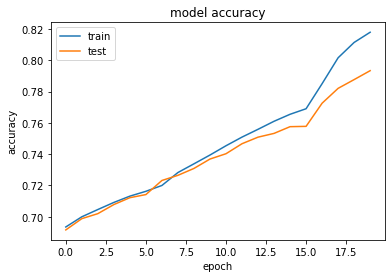

In [43]:
plt.plot(sgd.history['accuracy'])
plt.plot(sgd.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.title('model accuracy')

##### __(h) Change the optimizer to `optimizers.Adam` and retrain.__
_(Hint: Train the network with  20 epochs.)_

In [44]:
model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['accuracy'])
adam = model.fit(x_train_, y_train_, epochs=20, batch_size=10, validation_data=(x_test_, y_test_))
model.predict(x_test_)

Epoch 1/20
6000/6000 [==============================] - 21s 3ms/step - loss: 0.0161 - accuracy: 0.9041 - val_loss: 0.0307 - val_accuracy: 0.8454
Epoch 2/20
6000/6000 [==============================] - 17s 3ms/step - loss: 0.0101 - accuracy: 0.9347 - val_loss: 0.0313 - val_accuracy: 0.8430
Epoch 3/20
6000/6000 [==============================] - 19s 3ms/step - loss: 0.0086 - accuracy: 0.9445 - val_loss: 0.0302 - val_accuracy: 0.8484 accu - ETA: 0s - loss: 0.0086 
Epoch 4/20
6000/6000 [==============================] - 17s 3ms/step - loss: 0.0077 - accuracy: 0.9508 - val_loss: 0.0248 - val_accuracy: 0.8756
Epoch 5/20
6000/6000 [==============================] - 20s 3ms/step - loss: 0.0072 - accuracy: 0.9542 - val_loss: 0.0236 - val_accuracy: 0.8818
Epoch 6/20
6000/6000 [==============================] - 15s 3ms/step - loss: 0.0067 - accuracy: 0.9572 - val_loss: 0.0224 - val_accuracy: 0.8874
Epoch 7/20
6000/6000 [==============================] - 15s 2ms/step - loss: 0.0063 - accuracy: 0.9

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [45]:
score = model.evaluate(x_test_, y_test_)
print('loss =', score[0], ',accuracy =', score[1])
model.metrics[0].result().numpy(), model.metrics[1].result().numpy()

313/313 [==============================] - 1s 3ms/step - loss: 0.0240 - accuracy: 0.8797
loss = 0.024005478248000145 ,accuracy = 0.8797000050544739


(0.024005478, 0.8797)

##### __(i) Plot training and validation accuracy values for the new model.__

Text(0.5, 1.0, 'model accuracy')

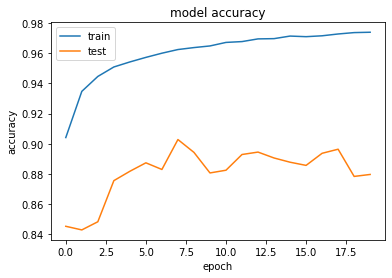

In [47]:
plt.plot(adam.history['accuracy'])
plt.plot(adam.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.title('model accuracy')

##### __(j) Compare the results of the two trained models and discuss the results.__

```
SGD has higher loss and lower accuracy. The training time is faster, but the loss and accuracy converge slower.
Adam has lower loss and higher accuracy. The loss and accuracy converge faster.
```

##### __(k) Do you see overfitting in the history?__

```
Adam is overfitting because it converges faster, and the accuracy of train is much higher than test.
SGD is not as it converges slower, and the accuracy is not better on train than on test.
```